In [106]:
side_length = 1000

population = 333333

third_population = population//3

num_parties = 3


### Function for printing a population to a map file

In [110]:
def print_map( People, filename = "map.map" ):
    # People: [[x, y, p1, p2, p3]]
    num_parties = People.shape[1] -2

    with open(filename, 'w') as F:
        first_line = f'{len(People)} {num_parties}\n'
        F.write(first_line)

        for i, person in enumerate(People):
            if i % 100 == 0:  print(f'\rWriting line {i +1}/{population}', end = '')

            (loc_x, loc_y, *Prefs) = person
            F.write(f'{loc_x} {loc_y} ')
            for pref in Prefs:  F.write(f'{pref:.3f} ')
            F.write('\n')

        # last line must be simply 0
        F.write('0')

    print("\rFinished generating file." + '\t'*2)

### Function that tests whether locations are in-bounds

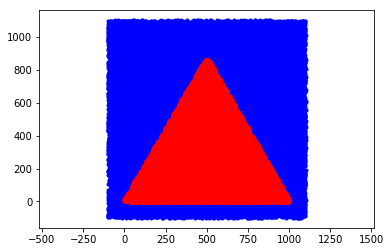

In [102]:
def is_within_bounds( Locations ):
    # make sure points lie on correct side of boundaries
    rt3_2 = np.sqrt(3)/2
    Valid_Normals = np.array([[0, 1], [rt3_2, -1/2], [-rt3_2, -1/2]]).T
    Valid_Thresh  = np.array([[   0 ,          0 ,          -rt3_2]]) *side_length
    
    # given n x 2 locations matrix, output m x 1 bool vector
    Projections = Locations @ Valid_Normals
    On_Good_Sides = Projections > Valid_Thresh
    Is_Valid = np.all(On_Good_Sides, axis = 1)
    return Is_Valid
    
# throw some random locations just to see how this works
L = (np.random.rand(population//10, 2) *1.2 -.1) * side_length
G = is_within_bounds(L)

LG = L[G]
import matplotlib.pyplot as plt
plt.plot(L[:,0], L[:,1], '.b')
plt.plot(LG[:,0], LG[:,1], 'or')
plt.axis("equal")
plt.show()

### Function that generates locations given a distribution

In [103]:
def generate_locations( population, distribution ):
    # generate random locations until there are enough valid

    # start with empty (ie. no) locations
    Locations = np.zeros((0, 2))
    while len(Locations) < population:
#        print(f'\rCurrent population: {len(Locations)}')
        # generate 10000 new locations according to distribution
        New_Locations = distribution(10000)
        # only append valid locations
        Is_Valid = is_within_bounds(New_Locations)
        Locations = np.vstack((Locations, New_Locations[Is_Valid]))
    #print('\r' + '\t' *10)
    # only use the number we want (ie. population)
    Locations = Locations[:population]
    return Locations

### Define Specific Distributions (for Locations and Preferences) & Generate Map

In [111]:
import numpy as np

# define a distribution
def make_normal_distribution( mean, cov ):
    def distribution( size ):
        # multi-variate normal distribution
        Locations = np.random.multivariate_normal(mean, cov, size = size)
        return Locations
    
    return distribution

mean = np.array([500, 500/np.sqrt(3)])
var = 250**2
cov = np.array([[var, 0],
                [0, var]])
normal_centered = make_normal_distribution(mean, cov)

right_bottom_mean = np.array([800, 100])
normal_right_bottom = make_normal_distribution(right_bottom_mean, cov)

left_bottom_mean = np.array([200, 100])
normal_left_bottom = make_normal_distribution(left_bottom_mean, cov)

top_mean = np.array([500, 800])
normal_top = make_normal_distribution(top_mean, cov)

# generate People matrix (x, y, p1, p2) -or- (x, y, p1, p2, p3) for each person
# - Normal centered distribution; whole population -
#Locations   = generate_locations(population, normal_centered)
Locations_bottom_r = generate_locations(third_population, normal_right_bottom)
Locations_bottom_l = generate_locations(third_population, normal_left_bottom)
Locations_top      = generate_locations(third_population, normal_top)

# use uniform distribution for preferences
Preferences = np.random.rand(third_population, num_parties)

Preference_1 = Preferences * [1, 0.1, 0.1]
Preference_2 = Preferences * [0.1, 1, 0.1]
Preference_3 = Preferences * [0.1, 0.1, 1]

# consolidate people as locations and preferences
# - For whole population, centered 
#People      = np.hstack((Locations, Preferences))
# - For three-corners populations
People_bottom_r = np.hstack((Locations_bottom_r, Preference_1))
People_bottom_l = np.hstack((Locations_bottom_l, Preference_2))
People_top      = np.hstack((Locations_top,      Preference_3))

People = np.vstack((People_bottom_r, People_bottom_l, People_top))




print_map(People, "map3.map")

Writing line 34901/333333

Finished generating file.		
